### Titanic Survival Prediction

step 1

##### Problem Definition

Predict the passengers that survived in the titanic shipwreck. which groups passengers are most likely to survive.

##### Import the dependencies

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

step 2

##### Data collection and preprocessing

import and loading the dataset

In [196]:
titanic = pd.read_csv('C:\\Desktop\\Machine learning weeks\\Titanic Project\\titanic_data.csv') 
titanic.head() #print first 5 rows of data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Overview of the dataset

In [197]:
titanic.shape  #number of rows and columns

(891, 12)

In [198]:
titanic.info()  #getting basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [199]:
titanic.columns  #getting column about the columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [200]:
titanic.nunique()  #finding the continous values and the categorical values

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [201]:
# Survived,Pclass,Sex,Sibsp,Parch,Embarked and Cabin are Categorical valus 

Data cleaning

In [202]:
# Removing the unwanted colums like Name,Ticket

titanic.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)

In [203]:
titanic.isnull().sum() #counting the missing values in each columns 

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [204]:
#Cabin have more 60% of missing values hence we can drop the column

titanic.drop(['Cabin'],axis=1,inplace=True)

In [205]:
#imputing the missing values in the age columns with the mean age

titanic.fillna({'Age':titanic['Age'].mean()},inplace=True)

In [206]:
#imputing embarked with most frequently occured value

titanic.fillna({'Embarked':titanic['Embarked'].mode()},inplace=True)

In [207]:
# finding any duplicates there

titanic.duplicated().sum()

# if duplicates occurs
# titanic.drop_duplicates(inplace=True) 

np.int64(111)

Date preprocessing

In [208]:
titanic.nunique()

Survived      2
Pclass        3
Sex           2
Age          89
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [209]:
titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [210]:
#Sex is in Object(String) form we need to convert it to numeric

titanic.rename(columns={'Sex':'Female'},inplace=True)

titanic['Female'] = titanic['Female'].map({'male':0,'female':1})

In [211]:
titanic.head()

,Survived,Pclass,Female,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


Step 3

##### Exploratory data analysis

In [212]:
# getting the basic decription of numerical values

titanic.describe().T  #T for transpose

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
Female,891.0,0.352413,0.477990,0.00,0.0000,0.000000,1.0,1.0000
Age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292


In [213]:
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

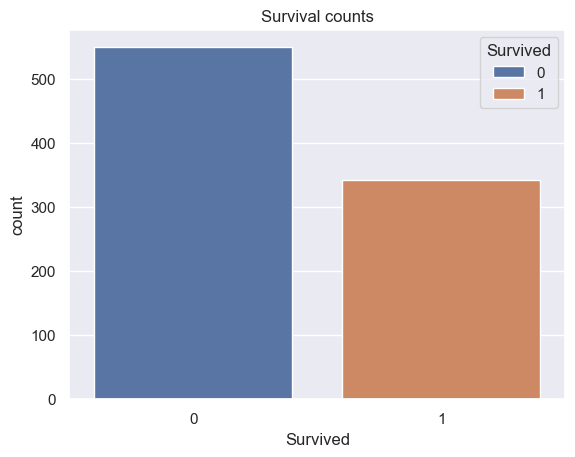

In [214]:
sns.countplot(x='Survived',data=titanic,hue='Survived')
plt.title("Survival counts")
plt.show()

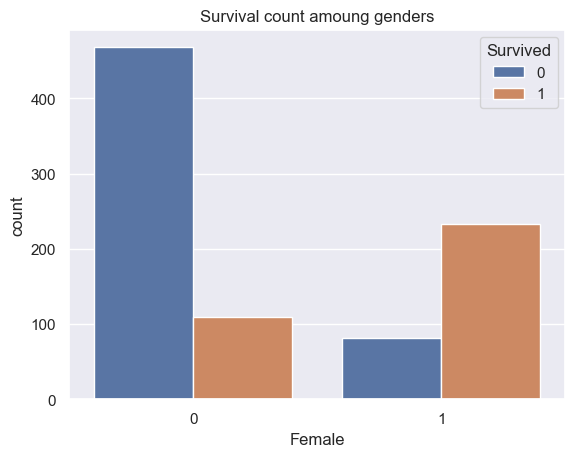

In [215]:
sns.countplot(data=titanic,x='Female',hue='Survived')
plt.title('Survival count amoung genders')
plt.show()

female is more likely to survived

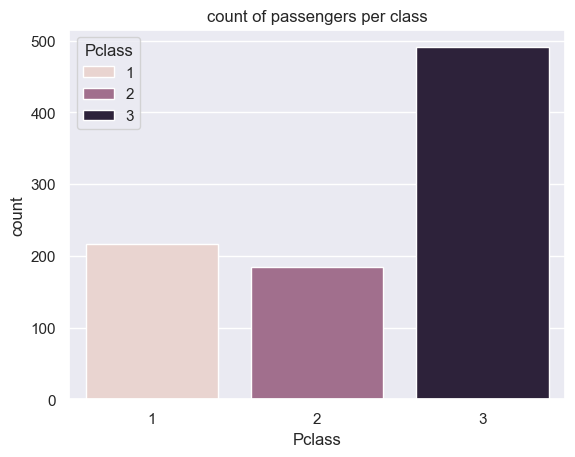

In [216]:
sns.countplot(data=titanic,x='Pclass',hue='Pclass')
plt.title('count of passengers per class')
plt.show()

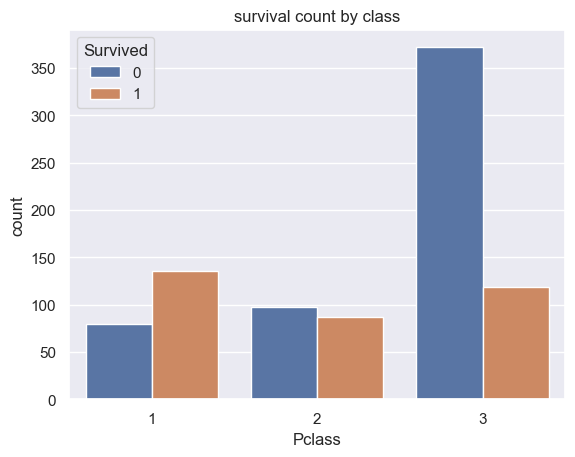

In [217]:
sns.countplot(data=titanic,x='Pclass',hue='Survived')
plt.title('survival count by class')
plt.show()

Passenger class 1 people is more likely to survive then class 2 then 3

<Axes: xlabel='Embarked', ylabel='count'>

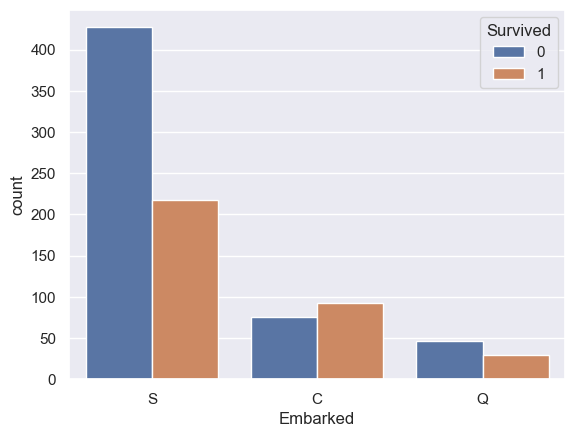

In [218]:
sns.countplot(data=titanic,x='Embarked',hue='Survived')

Embarked C is more likely to be survived

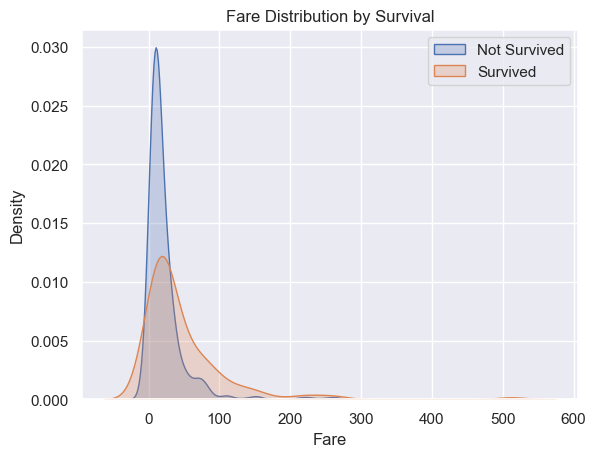

In [219]:
sns.kdeplot(data=titanic[titanic['Survived'] == 0], x='Fare', label='Not Survived', fill=True)
sns.kdeplot(data=titanic[titanic['Survived'] == 1], x='Fare', label='Survived', fill=True)

plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend()
plt.show()


Fare increases the chance for survival increases

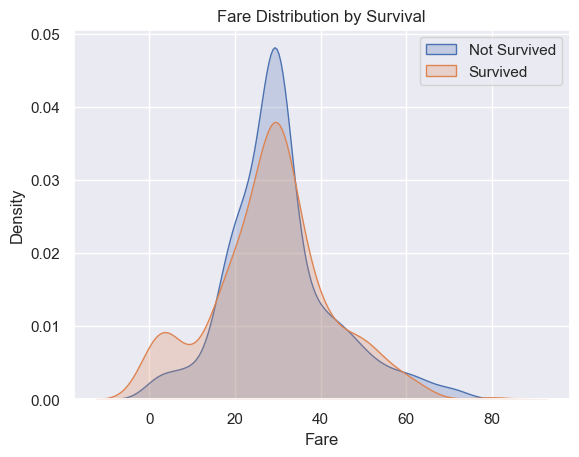

In [220]:
sns.kdeplot(data=titanic[titanic['Survived'] == 0], x='Age', label='Not Survived', fill=True)
sns.kdeplot(data=titanic[titanic['Survived'] == 1], x='Age', label='Survived', fill=True)

plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend()
plt.show()


below 15 has best chance to survive and above 70 has worst

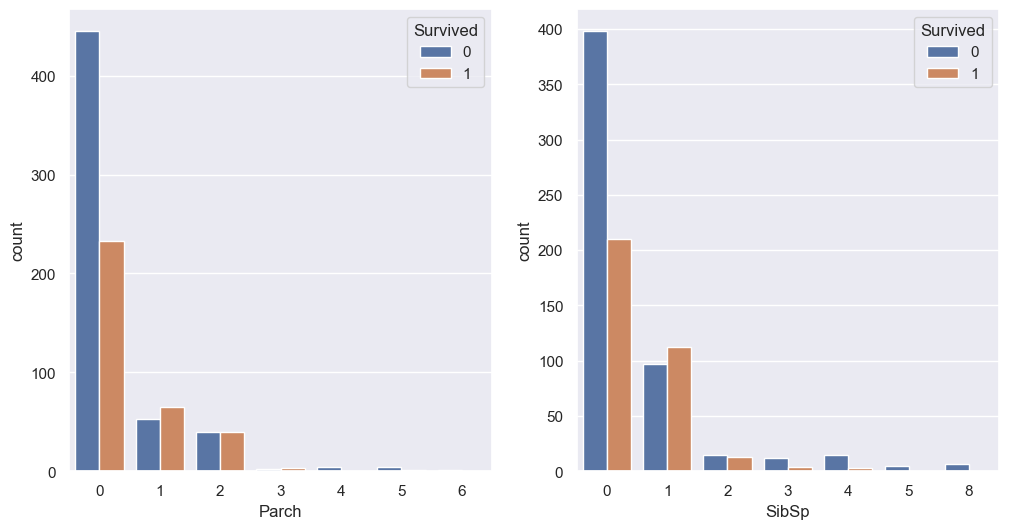

In [221]:
fig,axes = plt.subplots(1,2,figsize=(12,6))

sns.countplot(ax=axes[1],data=titanic,x='SibSp',hue='Survived')

sns.countplot(ax=axes[0],data=titanic,x='Parch',hue='Survived')

plt.show()

passengers with 1 or more people with them is more likely to survive

In [222]:
titanic.columns

Index(['Survived', 'Pclass', 'Female', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [223]:
df_encoded = pd.get_dummies(data=titanic['Embarked'],drop_first=True,prefix='Embarked').astype(int)
titanic = pd.concat([titanic,df_encoded],axis=1)
titanic.drop('Embarked',axis=1,inplace=True)


In [224]:
titanic.head()

,Survived,Pclass,Female,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,1
